# Music Recommender System (Project)

## Name: Suhani Khawas
## Roll no: 21
## course: AI/ML

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("spotify_millsongdata.csv")

In [4]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [5]:
df.tail(5)

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [6]:
df.shape

(57650, 4)

In [7]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [8]:
df = df.sample(5000).drop('link',axis=1).reset_index(drop=True)

In [9]:
df.head(5)

,artist,song,text
0,John Prine,The Frying Pan,I come home from work this evening \r\nThere ...
1,Unwritten Law,Save Me,"Had a bad day, don't talk to me, gonna ride th..."
2,Wet Wet Wet,Don't Let Me Be Lonely Tonight,"Do me wrong, do me right \r\nTell me lies, bu..."
3,Foo Fighters,Fraternity,I'll never be fraternity \r\nAnother disease ...
4,Marianne Faithfull,Eye Communication,I know you're out there having a good time. \...


In [10]:
df['text'][0]

"I come home from work this evening  \r\nThere was a note in the frying pan  \r\nIt said fix your own supper babe  \r\nI run off with the Fuller brush man  \r\nChorus:  \r\nAnd I miss the way she used to yell at me  \r\nThe way she used to cuss and moan  \r\nAnd if I ever go out and get married again  \r\nI'll never leave my wife at home  \r\nSat down at the table  \r\nScreamed, and I hollered and cried  \r\nAnd I commenced a carryin' on  \r\nTill I almost lost my mind  \r\nRepeat Chorus  \r\nIf I ever see another salesman  \r\nCome a knockin' at my door  \r\nI'm gonna pick up a rock and hit him on the head  \r\nAnd knock him down on the floor  \r\nRepeat Chorus\r\n\r\n"

In [11]:
df.shape

(5000, 3)

Text Cleaning/Text Preprocessing

In [12]:
df['text'] = df['text'].str.lower().replace(r'^\w\s',' ').replace(r'\n',' ', regex = True)

In [13]:
df['text'][0]

"i come home from work this evening  \r there was a note in the frying pan  \r it said fix your own supper babe  \r i run off with the fuller brush man  \r chorus:  \r and i miss the way she used to yell at me  \r the way she used to cuss and moan  \r and if i ever go out and get married again  \r i'll never leave my wife at home  \r sat down at the table  \r screamed, and i hollered and cried  \r and i commenced a carryin' on  \r till i almost lost my mind  \r repeat chorus  \r if i ever see another salesman  \r come a knockin' at my door  \r i'm gonna pick up a rock and hit him on the head  \r and knock him down on the floor  \r repeat chorus\r \r "

In [14]:
df.tail(5)

,artist,song,text
4995,King Diamond,The Poltergeist,some would say there is trouble in my home \r...
4996,Dolly Parton,Feel's Like Home,something in your eyes makes me want to lose m...
4997,Genesis,Ripples,blue girls come in every size \r some are wis...
4998,Air Supply,Daybreak,"daybreak, i can't hide the truth \r it seems ..."
4999,Uriah Heep,Holy Roller,i was born an only boy \r away from palm of w...


In [15]:
import nltk
from nltk.stem.porter import PorterStemmer

In [16]:
stemmer = PorterStemmer()

In [17]:
def token(txt):
    token = nltk.word_tokenize(txt)
    a = [stemmer.stem(w) for w in token]
    return " ".join(a)

In [18]:
token("you are beautiful, beauty")


'you are beauti , beauti'

In [19]:
df['text'].apply(lambda x: token(x))

0       i come home from work thi even there wa a note...
1       had a bad day , do n't talk to me , gon na rid...
2       do me wrong , do me right tell me lie , but ho...
3       i 'll never be fratern anoth diseas fratern ne...
4       i know you 're out there have a good time . sp...
                              ...                        
4995    some would say there is troubl in my home even...
4996    someth in your eye make me want to lose myself...
4997    blue girl come in everi size some are wise and...
4998    daybreak , i ca n't hide the truth it seem i '...
4999    i wa born an onli boy away from palm of water ...
Name: text, Length: 5000, dtype: object

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
tfid = TfidfVectorizer(analyzer='word', stop_words='english')

In [22]:
matrix=tfid.fit_transform(df['text'])

In [23]:
similer = cosine_similarity(matrix)

In [24]:
similer[0]

array([1.        , 0.00898686, 0.00440603, ..., 0.02690935, 0.06122347,
       0.08283661], shape=(5000,))

In [25]:
df[df['song']=='There For Me'].index[0]

np.int64(4995)

Recommender Function

In [25]:
def recommender(song_name):
    idx = df[df['song']==song_name].index[0]
    distance = sorted(list(enumerate(similer[idx])), reverse=True, key=lambda x:x[1])
    song = []
    for s_id in distance[1:21]:
        song.append(df.iloc[s_id[0]].song)
    return song

In [27]:
recommender("There For Me")

['My Brother Sarah - Sway B - Side',
 'Very Close To Far Away',
 'Too Close For Comfort',
 'Nothing Comes Close',
 'Sweet Vacation',
 'When I Close My Eyes',
 'How Can I Tell You',
 'Tell It Like It Is',
 "Jacob's Ladder",
 'Say You Love Me',
 'Feet On The Ground',
 'P.S. I Love You',
 'Words',
 'Open Door',
 'Everyday Again',
 'Could I Have This Kiss Forever',
 "Can't Get Close Enough To You",
 'Some Say',
 "Don't Cry",
 'Song To My Parents']

In [26]:
import pickle

In [27]:
pickle.dump(similer, open("similarity", "wb"))

In [28]:
pickle.dump(df, open("df", "wb"))

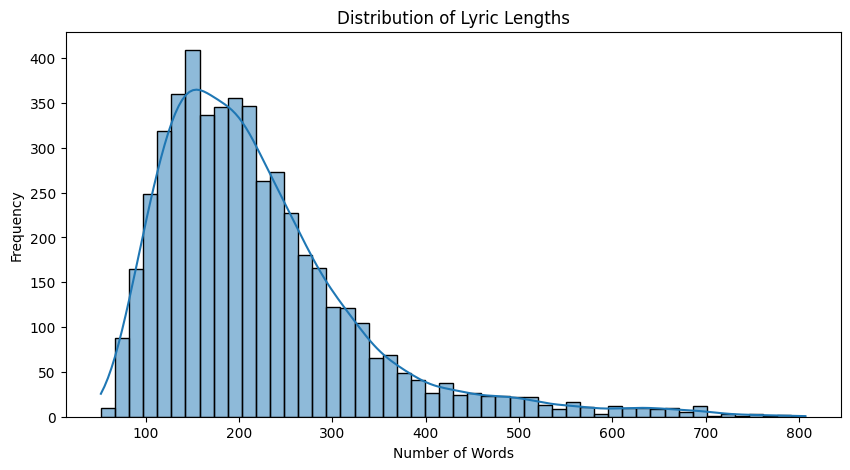

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

df['lyric_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['lyric_length'], bins=50, kde=True)
plt.title("Distribution of Lyric Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

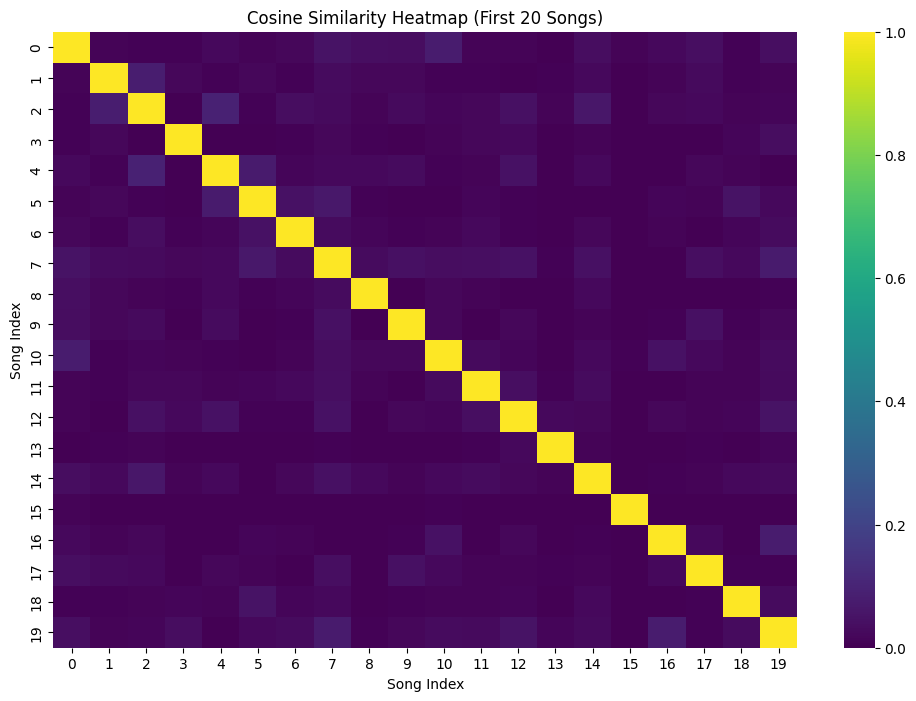

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

subset_sim = cosine_similarity(matrix[:20])
plt.figure(figsize=(12, 8))
sns.heatmap(subset_sim, cmap='viridis')
plt.title("Cosine Similarity Heatmap (First 20 Songs)")
plt.xlabel("Song Index")
plt.ylabel("Song Index")
plt.show()

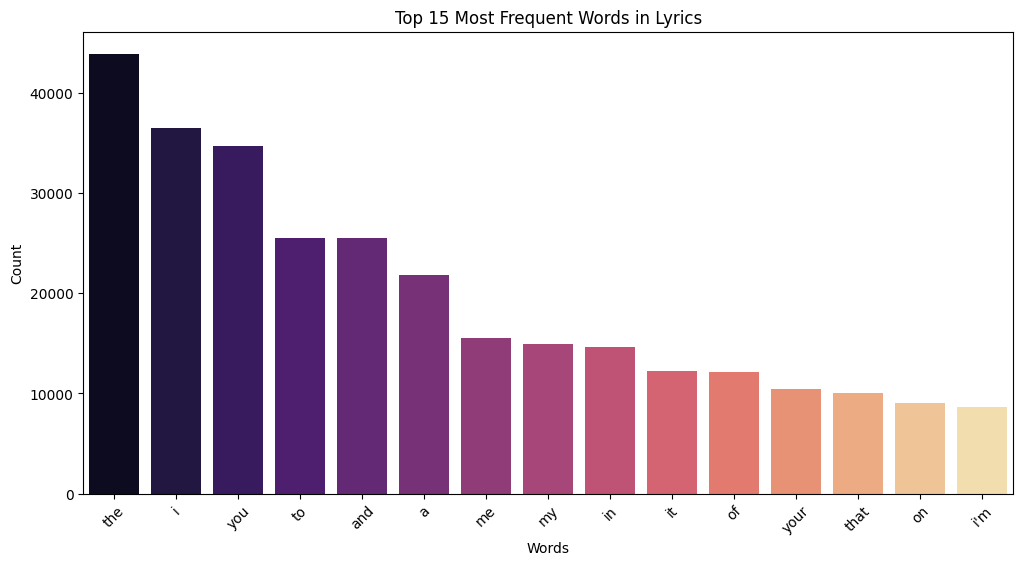

In [31]:

from collections import Counter

words = " ".join(df['text']).split()
common = Counter(words).most_common(15)
words_list, counts = zip(*common)

plot_df = pd.DataFrame({'word': words_list, 'count': counts})

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='word', y='count', hue='word', palette='magma', dodge=False, legend=False)
plt.title("Top 15 Most Frequent Words in Lyrics")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


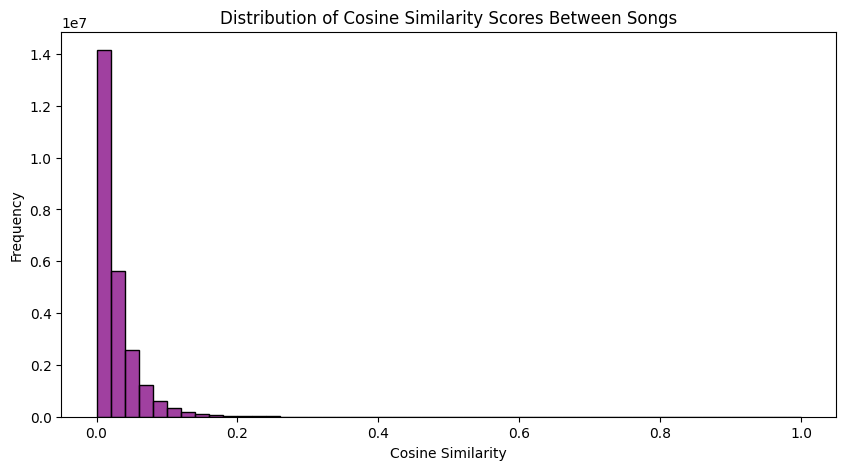

In [32]:
import numpy as np

all_scores = similer.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(all_scores, bins=50, color='purple')
plt.title("Distribution of Cosine Similarity Scores Between Songs")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [35]:
from sklearn.metrics import precision_score, f1_score

def evaluate_recommender(song_name, k=10):
    try:
        idx = df[df['song'] == song_name].index[0]
        target_artist = df.loc[idx, 'artist']
        recommended_songs = recommender(song_name)[:k]
        
        true_labels = [1 if df[df['song'] == song]['artist'].values[0] == target_artist else 0 for song in recommended_songs]
        predicted_labels = [1]*len(true_labels)  # all are predicted as similar

        precision = precision_score(true_labels, predicted_labels, zero_division=0)
        f1 = f1_score(true_labels, predicted_labels, zero_division=0)

        return precision, f1
    except:
        return None, None

# Example usage
precision, f1 = evaluate_recommender("There For Me")
print(f"Simulated Precision@10: {precision:.2f}")
print(f"Simulated F1-Score@10: {f1:.2f}")

Simulated Precision@10: 0.20
Simulated F1-Score@10: 0.33
